In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [8]:
from matplotlib import font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name = font_manager.FontProperties(fname="NanumBarunGothic.ttf").get_name()
plt.rc('font', family=font_name)
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [9]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#### 실습문제02 : PCA & t-sne
<font color="red">[Exercise 10]</font> 위 TSNE를 이용한 시각화 결과를 개선하기 위해, pca를 활용해보자.

1. X의 shape은 (1797, 64)이었는데, pca를 이용하여 (1797, 32)로 변환하고,
2. X_pca를 이용하여 2차원에서 t-SNE로 그래프를 그려보자.
 - 이때 init을 첫 2개의 주성분을 이용한다.

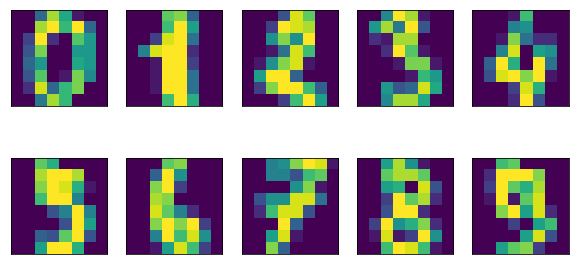

In [10]:
# 0. 데이터 불러오기
# t-sne 예제 : MNIST
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, '두 번째 주성분')

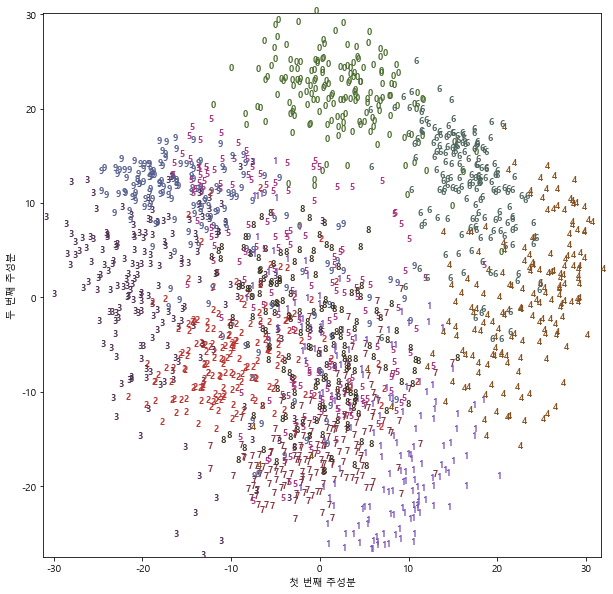

In [13]:
# 1. PCA 모델을 생성합니다
pca = PCA(n_components=32)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
X_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max())
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(X_pca[i, 0], X_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [23]:
X_pca.shape

(1797, 32)

In [24]:
# 2. TSNE model 생성
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, init= X_pca[:, 0:2])
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(X_pca)

Text(0.5, 0, 't-SNE 특성 1')

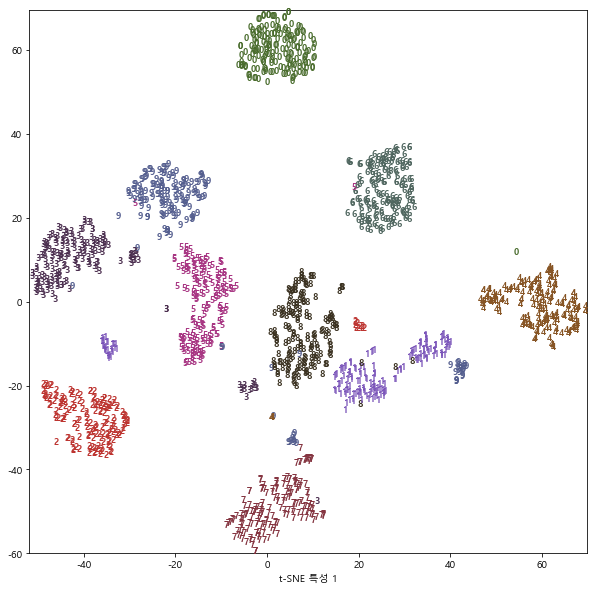

In [25]:
# 3. 시각화
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), # x와 y 축을 이용해서.
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.xlabel("t-SNE 특성 1")

In [29]:
# loss값 확인
# 어떠한 데이터를 fit_transform 하냐에 따라 loss가 다름.
tsne.kl_divergence_

0.764579713344574

In [30]:
digits_tsne.shape

(1797, 2)